In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc


In [2]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [4]:
df=pd.read_json('dfObs_v01.json');
df=df.sort_index();
len(df)
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [5]:
df.head()

,sents,chapter,entities,chunks,label
0,Chapter 1,1.0,[],[Chapter],0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1.0,[],"[the distinction, the first motion, the second or proper motions, the proper motions, the second inequality]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1.0,[],"[The testimony, the ages, the motions, the planets]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1.0,[],"[Reason, experience, their gyrations, perfect circles]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1.0,[],"[figures, it, circles, bodies, the heavens]",0


In [6]:
df.tail()

,sents,chapter,entities,chunks,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[('Mars', 'PLAN'), ('opposition', 'ASTR'), ('Mars', 'PLAN'), ('Earth', 'PLAN'), ('Sun', 'PLAN'), ('17 hours 20 minutes', 'TIME'), ('Mars', 'PLAN'), ('eastward', 'ASTR'), ('Sun', 'PLAN')]","[the position, Mars, opposition, Kepler, the angular distance, Mars, Earth, the place, 17 hours, Mars]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[('longitude', 'ASTR'), ('Mars', 'PLAN'), ('opposition', 'ASTR'), ('198° 37\' 50""', 'LONG'), ('Mars', 'PLAN'), ('orbit', 'ASTR'), ('198° 37\' 10""', 'LONG'), ('18° 37\' 10"" Libra', 'LONG')]","[Kepler, the longitude, Mars, opposition, 198°, he, order, Mars's orbit, he, 198°, ' 10"" Libra]",1
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[('Sun', 'PLAN'), ('longitude', 'ASTR'), ('observation', 'ASTR'), ('Mars', 'PLAN')]","[The Sun, its longitude, the time, observation, its position, Mars]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[('opposition', 'ASTR'), ('17 hours 20 minutes', 'TIME'), ('March 29', 'DATE'), ('observation', 'ASTR')]","[the time, opposition, 17 hours, March, the time, the observation]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[('opposition', 'ASTR'), ('March 28', 'DATE'), ('4h 23m', 'TIME')]","[Kepler, the time, opposition, March, 23m AM, old style]",1


In [7]:
X = list(df["sents"])

In [8]:
y = np.array(list(df["label"]))

# Distribution of Samples 

In [9]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [10]:
count

{0: 6264, 1: 435}

Text(0.5, 1.0, 'Distribution of samples over different classes')

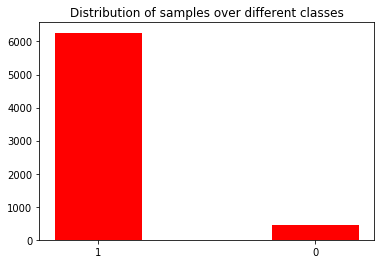

In [11]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [12]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier

In [13]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [15]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import metrics
import keras.backend as K
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

## Models

In [22]:
vocab_size = 6628
tokenize = Tokenizer(num_words=vocab_size)
tokenize.fit_on_texts(X_train)

In [23]:
x_train = tokenize.texts_to_matrix(X_train)
x_test =tokenize.texts_to_matrix(X_test)

In [24]:
def recall(y_true, y_pred):
    #Recall metric.

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)),axis=0)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)),axis=0)
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [25]:
max_words = 6628
num_classes=1
batch_size=8
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[recall,'accuracy'])
print(model.metrics_names)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
['loss', 'recall', 'acc']


In [26]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=200, verbose=1, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 4521 samples, validate on 503 samples
Epoch 1/200
4521/4521 [==============================] - 15s 3ms/step - loss: 0.2026 - recall: 0.0245 - acc: 0.9328 - val_loss: 0.1650 - val_recall: 0.1564 - val_acc: 0.9304
Epoch 2/200
4521/4521 [==============================] - 15s 3ms/step - loss: 0.0843 - recall: 0.2622 - acc: 0.9684 - val_loss: 0.1974 - val_recall: 0.2041 - val_acc: 0.9384
Epoch 3/200
4521/4521 [==============================] - 14s 3ms/step - loss: 0.0318 - recall: 0.3701 - acc: 0.9896 - val_loss: 0.2359 - val_recall: 0.1935 - val_acc: 0.9384
Epoch 4/200
4521/4521 [==============================] - 14s 3ms/step - loss: 1.8711e-05 - recall: 0.4088 - acc: 1.0000 - val_loss: 0.5253 - val_recall: 0.1750 - val_acc: 0.9324
Epoch 17/200
4521/4521 [==============================] - 14s 3ms/step - loss: 1.4477e-05 - recall: 0.4070 - acc: 1.0000 - val_loss: 0.5387 - val_recall: 0.1750 - val_acc: 0.9324
Epoch 18/200
4521/4521 [==

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [2.2410936e-13],
       [8.2340361e-15],
       [2.1715971e-23]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    metrics = sorted(history.history.keys())
    metrics = metrics[:len(metrics)//2]
    
    f,axs = plt.subplots(1, len(metrics), figsize=(12,4))
    plt.subplots_adjust( right=1.5)

    for m,ax in zip(metrics,axs):
        # summarize history for metric m
        ax.plot(history.history[m])
        ax.plot(history.history['val_' + m])
        ax.set_title(m)
        ax.set_ylabel(m)
        ax.set_xlabel('epoch')
        ax.legend(['train', 'validation'], loc='best')

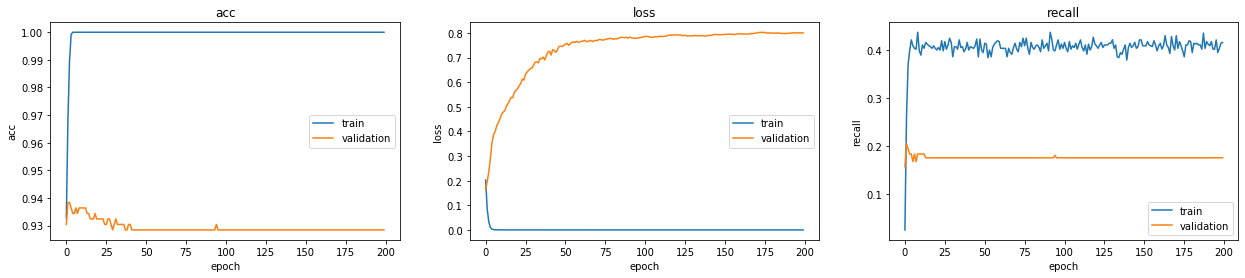

In [ ]:
plot_history(history)